In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re

In [ ]:
df = pd.read_csv("base.csv", sep = ",")

In [ ]:
df

,TICK,DATA,W \ L,BUY \ SELL,TEMPO GRAF.,GANHO,TIPO
0,PETR4,25/11/2021,W,BUY,15 MIN,"1,94%",DT
1,VALE3,30/11/2021,W,BUY,15 MIN,"2,20%",DT
2,ITUB4,30/11/2021,W,BUY,15 MIN,"0,54%",DT
3,ABEV3,30/11/2021,W,BUY,15 MIN,"0,86%",DT
4,BBDC4,30/11/2021,W,BUY,15 MIN,"0,75%",DT
...,...,...,...,...,...,...,...
245,ITUB4,22/12/2022,W,SELL,15 MIN,"1,30%",DT
246,BBAS3,26/12/2022,W,SELL,15 MIN,"0,52%",DT
247,BBAS3,27/12/2022,W,SELL,15 MIN,"2,00%",DT
248,ITUB4,27/12/2022,W,SELL,15 MIN,"0,93%",DT


In [ ]:
df.rename(columns = {
    "TICK": "ticker",
    "DATA": "data",
    "W \ L": "win_loss",
    "BUY \ SELL": "buy_sell",
    "TEMPO GRAF.": "time",
    "GANHO": "percentage",
    "TIPO": "type"
}, inplace = True)

In [ ]:
df

,ticker,data,win_loss,buy_sell,time,percentage,type
0,PETR4,25/11/2021,W,BUY,15 MIN,"1,94%",DT
1,VALE3,30/11/2021,W,BUY,15 MIN,"2,20%",DT
2,ITUB4,30/11/2021,W,BUY,15 MIN,"0,54%",DT
3,ABEV3,30/11/2021,W,BUY,15 MIN,"0,86%",DT
4,BBDC4,30/11/2021,W,BUY,15 MIN,"0,75%",DT
...,...,...,...,...,...,...,...
245,ITUB4,22/12/2022,W,SELL,15 MIN,"1,30%",DT
246,BBAS3,26/12/2022,W,SELL,15 MIN,"0,52%",DT
247,BBAS3,27/12/2022,W,SELL,15 MIN,"2,00%",DT
248,ITUB4,27/12/2022,W,SELL,15 MIN,"0,93%",DT


In [ ]:
text = "15 MIN"
new_text = re.sub("\D", "", text)
print(new_text)

15


In [ ]:
df.time.unique()

array(['15 MIN', 'SEMANAL', '5 MIN'], dtype=object)

In [ ]:
df.time = df.time.apply(lambda x: 10080 if x == "SEMANAL" else re.sub("\D", "", x))

In [ ]:
df.time.unique()

array(['15', 10080, '5'], dtype=object)

In [ ]:
df.win_loss = df.win_loss.apply(lambda x: re.sub("\s", "", x))

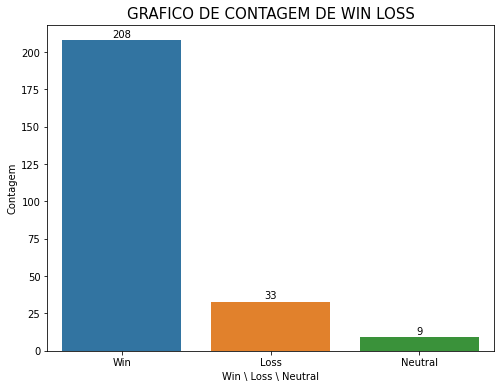

In [ ]:
plt.figure(figsize = (8,6))
plt.title("GRAFICO DE CONTAGEM DE WIN LOSS", fontsize = 15)

ax = sns.countplot(data = df, x = "win_loss")

plt.xlabel(xlabel = "Win \ Loss \ Neutral")
plt.ylabel(ylabel = "Contagem")

for patch in ax.patches:
  y_value = patch.get_height()
  x_value = patch.get_x() + patch.get_width() / 2
  space = 1
  label = format(y_value)
  ax.annotate(label, 
              (x_value, y_value), 
              xytext = (0, space), 
              textcoords = "offset points", 
              ha = "center", 
              va = "bottom")

plt.xticks(ticks = [0,1,2], labels = ["Win", "Loss", "Neutral"]);

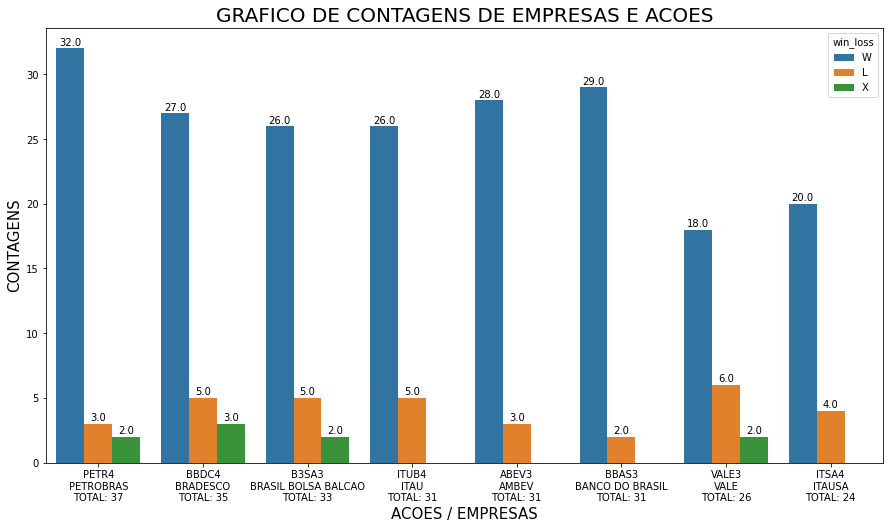

In [ ]:
petrobras = df[df.ticker == "PETR4"].ticker.value_counts().sum()
bradesco = df[df.ticker == "BBDC4"].ticker.value_counts().sum()
brasil_bolsa_balcao = df[df.ticker == "B3SA3"].ticker.value_counts().sum()
itau = df[df.ticker == "ITUB4"].ticker.value_counts().sum()
ambev = df[df.ticker == "ABEV3"].ticker.value_counts().sum()
banco_do_brasil = df[df.ticker == "BBAS3"].ticker.value_counts().sum()
vale = df[df.ticker == "VALE3"].ticker.value_counts().sum()
itausa = df[df.ticker == "ITSA4"].ticker.value_counts().sum()



plt.figure(figsize = (15,8))
plt.title("GRAFICO DE CONTAGENS DE EMPRESAS E ACOES", fontsize = 20)


ax = sns.countplot(data = df, x = "ticker", hue = df.win_loss,order = df.ticker.value_counts().index)

for patch in ax.patches:
  y_value = patch.get_height()
  x_value = patch.get_x() + patch.get_width() / 2
  space = 1
  label = format(y_value)
  ax.annotate(label, 
              (x_value, y_value), 
              xytext = (0, space), 
              textcoords = "offset points", 
              ha = "center", 
              va = "bottom")

plt.xlabel(xlabel = "ACOES / EMPRESAS", fontsize = 15)
plt.ylabel(ylabel = "CONTAGENS", fontsize = 15)

plt.xticks(ticks = [0,1,2,3,4,5,6,7], labels = 
           [f"PETR4\nPETROBRAS\nTOTAL: {petrobras}", 
            f"BBDC4\nBRADESCO\nTOTAL: {bradesco}", 
            f"B3SA3\nBRASIL BOLSA BALCAO\nTOTAL: {brasil_bolsa_balcao}", 
            f"ITUB4\nITAU\nTOTAL: {itau}", 
            f"ABEV3\nAMBEV\nTOTAL: {ambev}", 
            f"BBAS3\nBANCO DO BRASIL\nTOTAL: {banco_do_brasil}",
            f"VALE3\nVALE\nTOTAL: {vale}", 
            f"ITSA4\nITAUSA\nTOTAL: {itausa}"]);

In [ ]:
df[df.ticker == "PETR4"].ticker.value_counts().sum()

37

In [ ]:
df.percentage = df.percentage.apply(lambda x: re.sub(",", ".", x))

In [ ]:
df.percentage = df.percentage.apply(lambda x: re.sub("%", "", x))

In [ ]:
df

,ticker,data,win_loss,buy_sell,time,percentage,type
0,PETR4,25/11/2021,W,BUY,15,1.94,DT
1,VALE3,30/11/2021,W,BUY,15,2.20,DT
2,ITUB4,30/11/2021,W,BUY,15,0.54,DT
3,ABEV3,30/11/2021,W,BUY,15,0.86,DT
4,BBDC4,30/11/2021,W,BUY,15,0.75,DT
...,...,...,...,...,...,...,...
245,ITUB4,22/12/2022,W,SELL,15,1.30,DT
246,BBAS3,26/12/2022,W,SELL,15,0.52,DT
247,BBAS3,27/12/2022,W,SELL,15,2.00,DT
248,ITUB4,27/12/2022,W,SELL,15,0.93,DT


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ticker      248 non-null    object
 1   data        250 non-null    object
 2   win_loss    250 non-null    object
 3   buy_sell    250 non-null    object
 4   time        250 non-null    object
 5   percentage  250 non-null    object
 6   type        250 non-null    object
dtypes: object(7)
memory usage: 13.8+ KB


In [ ]:
df.percentage = df.percentage.astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ticker      248 non-null    object 
 1   data        250 non-null    object 
 2   win_loss    250 non-null    object 
 3   buy_sell    250 non-null    object 
 4   time        250 non-null    object 
 5   percentage  250 non-null    float64
 6   type        250 non-null    object 
dtypes: float64(1), object(6)
memory usage: 13.8+ KB


In [ ]:
wins = df[df.win_loss == "W"]

In [ ]:
wins

,ticker,data,win_loss,buy_sell,time,percentage,type
0,PETR4,25/11/2021,W,BUY,15,1.94,DT
1,VALE3,30/11/2021,W,BUY,15,2.20,DT
2,ITUB4,30/11/2021,W,BUY,15,0.54,DT
3,ABEV3,30/11/2021,W,BUY,15,0.86,DT
4,BBDC4,30/11/2021,W,BUY,15,0.75,DT
...,...,...,...,...,...,...,...
245,ITUB4,22/12/2022,W,SELL,15,1.30,DT
246,BBAS3,26/12/2022,W,SELL,15,0.52,DT
247,BBAS3,27/12/2022,W,SELL,15,2.00,DT
248,ITUB4,27/12/2022,W,SELL,15,0.93,DT


In [ ]:
round(wins.percentage.mean(), 2)

1.28

In [ ]:
loss = df[df.win_loss == "L"]

In [ ]:
loss.head(5)

,ticker,data,win_loss,buy_sell,time,percentage,type
8,PETR4,15/12/2021,L,BUY,15,-0.20,DT
29,ABEV3,31/01/2022,L,BUY,15,-0.42,DT
34,ITSA4,14/02/2022,L,SELL,5,0.39,DT
39,ABEV3,21/02/2022,L,SELL,15,-0.61,DT
40,VALE3,21/02/2022,L,BUY,15,-0.70,DT


In [ ]:
round(loss.percentage.mean(), 2) 

-0.58

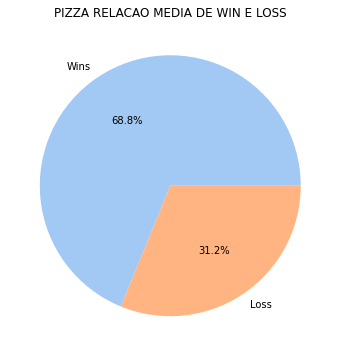

In [ ]:
plt.figure(figsize = (7, 6))
plt.title("PIZZA RELACAO MEDIA DE WIN E LOSS")

colors = sns.color_palette('pastel')[0:3]
plt.pie([1.28, .58], labels = ["Wins", "Loss"], colors = colors, autopct='%.1f%%');

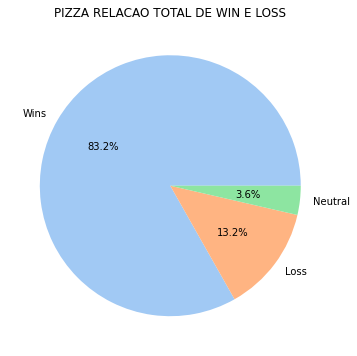

In [ ]:
plt.figure(figsize = (7, 6))
plt.title("PIZZA RELACAO TOTAL DE WIN E LOSS")


colors = sns.color_palette('pastel')[0:3]
plt.pie(df.win_loss.value_counts(), labels = ["Wins", "Loss", "Neutral"], colors = colors, autopct='%.1f%%');